In [2]:
import cmath
import control
from control.matlab import step
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

### Prova 2 Rayan/Jonhatan -> Lista EE-2

#### Questão 1

In [53]:
K = 0.2;
C = 1000e-6;
L = 10e-3;
R = 5;

tfinal = 1e-3;

In [54]:
# Matrizes de estados cálculadas 
# X1 = Vc1; X2 = iL
A = np.block([[-1/(R*C), 1/C ],[ -1/L , 0 ]])
B = np.block([[K/(R*C) ],[ 1/L ]])
C = np.block([[1, 0]])
D = K;

In [57]:
G = control.ss(A,B,C,D)
G

<LinearIOSystem:sys[12]:['u[0]']->['y[0]']>

In [58]:
system = control.ss2tf(sys)
system

TransferFunction(array([2.0e-01, 8.0e+01, 1.2e+05]), array([1.e+00, 2.e+02, 1.e+05]))

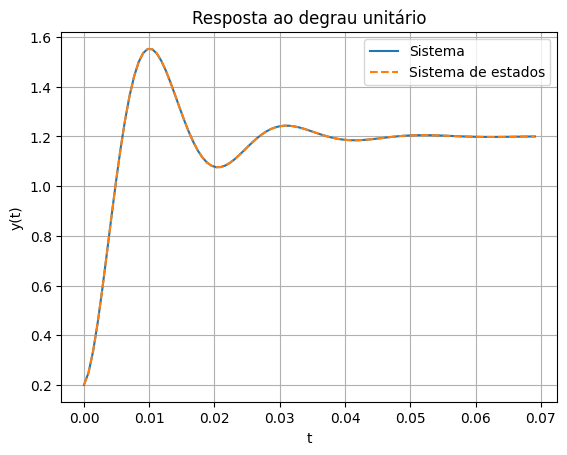

In [59]:
x, y = control.step_response(system)
x2, y2 = control.step_response(G)
plt.figure()
plt.plot(x, y, label='Sistema')
plt.plot(x2, y2, ls= '--', label='Sistema de estados')
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
Ts = 1e-3
Fs = 1/Ts
tfinal = 0.1

Kmax = int((tfinal/Ts)+1)

t =np.linspace(0, tfinal, Kmax)

# declaração dos vetores
u = np.ones(Kmax);
x1 = np.zeros(Kmax);
x2 = np.zeros(Kmax);

x1_ponto = np.zeros(len(t))
x2_ponto = np.zeros(len(t))
y = np.zeros(len(t))

#condições iniciais
j=0

# Equação diferencial de estados:  Xponto=A*X+B*U
x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j]; 

# Equação de Saída: Y=C*X+D*U
y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];

for j in range(1,Kmax):
    # Equações dos integradores
    x1[j] = Ts*x1_ponto[j-1] + x1[j-1];
    x2[j] = Ts*x2_ponto[j-1] + x2[j-1];    

    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = A[0,0]*x1[j] + A[0,1]*x2[j] + B[0]*u[j];  
    x2_ponto[j] = A[1,0]*x1[j] + A[1,1]*x2[j] + B[1]*u[j]; 

    # Equação de Saída: Y=C*X+D*U
    y[j] = C[0,0]*x1[j] + C[0,1]*x2[j] + D*u[j];

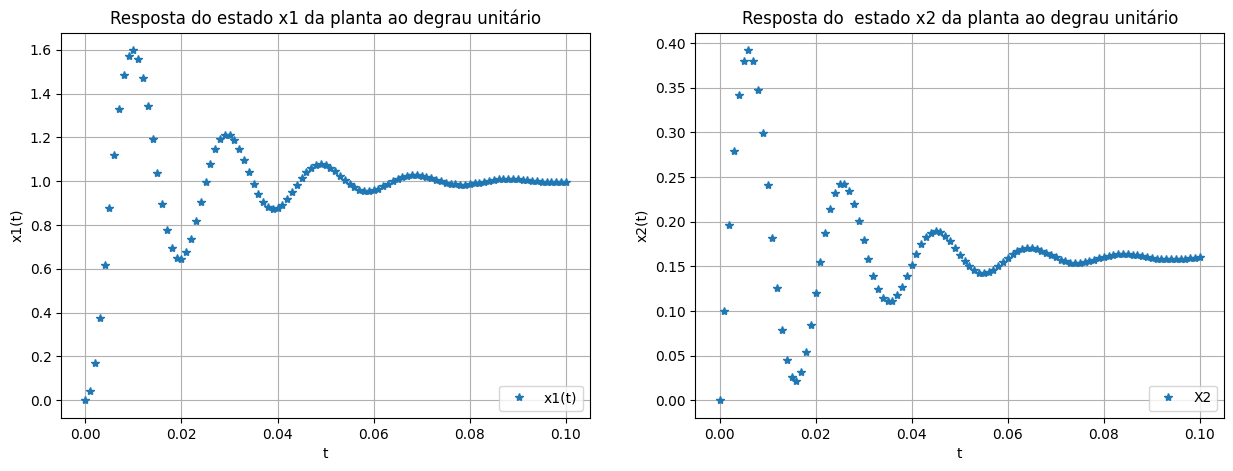

In [64]:
# resposta para entrada ao degrau
fig, ((ax1, ax2) ) = plt.subplots(1, 2)
fig.set_size_inches(15,5)

ax1.plot(t,x1,'*')
ax1.set_title("Resposta do estado x1 da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.legend(['x1(t)'],loc="lower right")
ax1.grid(True,'both')

ax2.plot(t,x2,'*')
ax2.set_title("Resposta do  estado x2 da planta ao degrau unitário")
ax2.set_xlabel("t")
ax2.set_ylabel("x2(t)")
ax2.legend(['X2','X~2'],loc="lower right")
ax2.grid(True)

#### Questão 2

In [76]:
A = np.matrix('0 1;-8 -6');
B = np.matrix('0; 1');
C = np.matrix('1 0');
D = 0;

G = control.ss(A,B,C,D)
G

<LinearIOSystem:sys[17]:['u[0]']->['y[0]']>

In [78]:
# Verificando polos da planta
eigenvalues, eigenvectors = linalg.eig(A);
poles = eigenvalues
print(poles)

[-2.+0.j -4.+0.j]


In [80]:
# Matrizes reduzidas
Aaa = A[0,0]
Aab = A[0,1]
Aba = A[1,0]
Abb = A[1,1]

Ba = B[0,0]
Bb = B[1,0]

In [81]:
# Matriz de Controlabilidade do sistema dual para ordem mínima
Mc = control.ctrb(Aab,Abb)
Mc

# Teste de Controlabilidade
rank_Mc = np.linalg.matrix_rank(Mc) #número de postos do sistema

if len(Mc) == rank_Mc:          
    print("O sistema é controlável")

O sistema é controlável


In [92]:
# Polo do observador, 5 vezes mais rápido do que os polos do controlador

L = -5*abs(polos_planta[1]);

# Ganho do observador
Ke = control.acker(Abb,Aab,[L])
print(Ke)
Ke = Ke[0,0]      # Transformando em escalar
print(f'Ke escalar: {Ke}')

Achapeu = Abb-Ke*Aab;
Bchapeu = Achapeu*Ke+Aba-Ke*Aaa
Fchapeu = Bb-Ke*Ba;

Cchapeu = np.matrix('0;1');
Dchapeu = np.block([[1], [Ke]]);


print("L: " + str(L) + "\n")
print("Ke: " + str(Ke) + "\n")
print("Achapeu: " + str(Achapeu) + "\n")
print("Bchapeu: " + str(Bchapeu) + "\n")
print("Fchapeu: " + str(Fchapeu) + "\n")
print("Cchapeu: " + str(Cchapeu) + "\n")
print("Dchapeu: " + str(Dchapeu) + "\n")

[[14.]]
Ke escalar: 14.0
L: -20.0

Ke: 14.0

Achapeu: [[-20.]]

Bchapeu: [[-288.]]

Fchapeu: 1.0

Cchapeu: [[0]
 [1]]

Dchapeu: [[ 1.]
 [14.]]



In [94]:
# simulação com equações recursivas
# definindo o intervalo de simulação e o vetor de entrada
Fs = 2000
T = 1/Fs;
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, int(Fs*tfinal))
u = np.ones(len(k));

# definindo os vetores
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
y = np.zeros(len(k));
eta1 = np.zeros(len(k));
eta1_ponto = np.zeros(len(k));
xtil1 = np.zeros(len(k));
xtil2 = np.zeros(len(k));

# condições iniciais (podem ser diferentes de zero)
x1[0] = 0;  #  para k = 0
x2[0] = 0;  #  para k = 0
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+D*u[0];  #  para k = 0
eta1[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu*u[0];  #  para k = 0



for j in range(1,Kmax-1):
    # sistema original
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    
        
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+B[0]*u[j];  
        x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+B[1]*u[j]; 

        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+D*u[j];

    # observador de ordem mínima
        # Equações dos integradores do observador
        eta1[j]=T*eta1_ponto[j-1]+eta1[j-1];
    
        # Equação diferencial de estados do observador
        eta1_ponto[j]=Achapeu*eta1[j]+Bchapeu*y[j]+Fchapeu*u[j];
    
    # Transformação
        # equação de saída do observador de ordem mínima
        xtil1[j]=Cchapeu[0,0]*eta1[j]+Dchapeu[0]*y[j];
        xtil2[j]=Cchapeu[1,0]*eta1[j]+Dchapeu[1]*y[j];

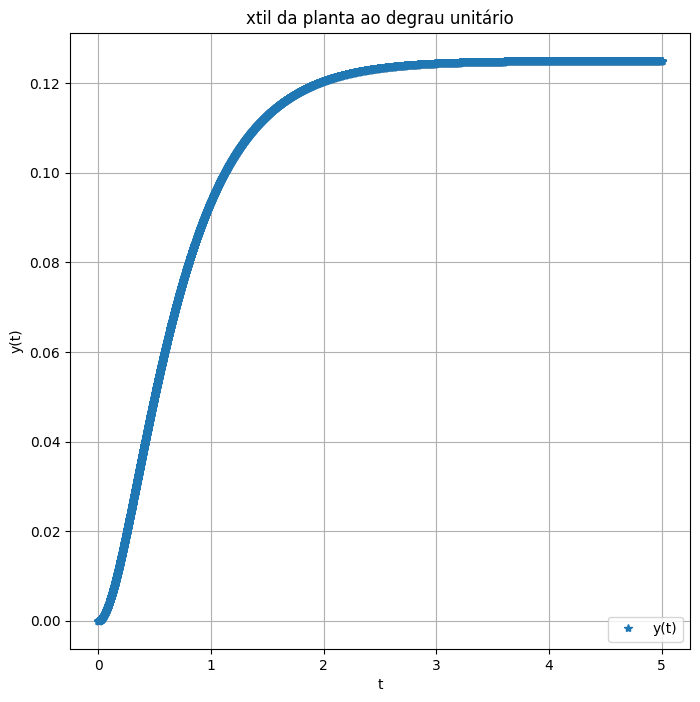

In [95]:
# resposta para entrada ao degrau
fig, ((ax1) ) = plt.subplots(1, 1)
fig.set_size_inches(8,8)

ax1.plot(k*T,xtil1,'*')
ax1.set_title("xtil da planta ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['y(t)'],loc="lower right")
ax1.grid(True,'both')

As equações míinimas para implementação do observador em um microcontrolador seriam:

# observador de ordem mínima
    # Equações dos integradores do observador
    eta1[j]=T*eta1_ponto[j-1]+eta1[j-1];

    # Equação diferencial de estados do observador
    eta1_ponto[j]=Achapeu*eta1[j]+Bchapeu*y[j]+Fchapeu*u[j];

# Transformação
    # equação de saída do observador de ordem mínima
    xtil1[j]=Cchapeu[0,0]*eta1[j]+Dchapeu[0]*y[j];
    xtil2[j]=Cchapeu[1,0]*eta1[j]+Dchapeu[1]*y[j];



#### Questão 3

In [8]:
A = np.matrix([[0,1], [(-3),(-2)]])
B = np.matrix([[0], [1]])
C =  np.matrix('1, 0')
D = np.matrix('0')

In [13]:
print('A:\n', A)
print('B:\n', B)
print('C:\n', C)

A:
 [[ 0  1]
 [-3 -2]]
B:
 [[0]
 [1]]
C:
 [[1 0]]


In [16]:
G = control.ss(A,B,C,D)
G

<LinearIOSystem:sys[4]:['u[0]']->['y[0]']>

In [18]:
system = control.ss2tf(G)
print(system)


      1
-------------
s^2 + 2 s + 3



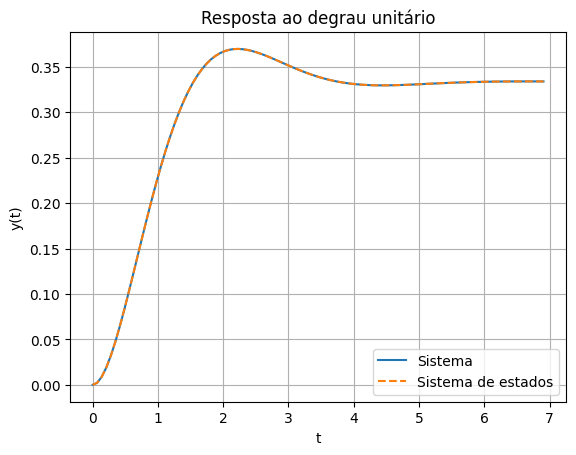

In [21]:
x, y = control.step_response(system) #primeiro usando a resposta ao degrau da função de transferência do sistema
x2, y2 = control.step_response(G) #Usando o sistema de estados
plt.figure()
plt.plot(x, y, label='Sistema')
plt.plot(x2, y2, ls= '--', label='Sistema de estados')
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Verificando polos da planta
eigenvalues, eigenvectors = linalg.eig(A);
poles = eigenvalues
print(poles)

[-1.+1.41421356j -1.-1.41421356j]


In [29]:
#Projeto de controlador da planta

zeta = 0.7
wn = 4
wd= wn*math.sqrt(1-(zeta**2))
Mp = np.exp((-np.pi*zeta)/np.sqrt(1-zeta**2))
ts5=3/(zeta*wn)
tp = np.pi/wd

#Polos desejados
s1 = -zeta*wn + 1j*wd
s2 = -zeta*wn - 1j*wd
s3 = -10*abs(s1);

print(f'zeta: {zeta}')
print(f'wd: {wd}')
print(f'wn: {wn}')
print(f'Ts5%: {ts5}')
print(f'Tp: {tp}')
print(f'Sobressinal Mp = {Mp}')
print(f'\nPolos:\ns1 = {s1}\ns2 = {s2}\ns3 = {s3}')


zeta: 0.7
wd: 2.85657137141714
wn: 4
Ts5%: 1.0714285714285714
Tp: 1.0997774062376235
Sobressinal Mp = 0.04598791026026775

Polos:
s1 = (-2.8+2.85657137141714j)
s2 = (-2.8-2.85657137141714j)
s3 = -39.99999999999999


In [30]:
# Teste de Controlabilidade
Mc = control.ctrb(A,B)
Mc

rank_Mc = np.linalg.matrix_rank(Mc) 

if len(Mc) == rank_Mc:          
    print("O sistema é controlável")

O sistema é controlável


In [31]:
# Equação característica desejada
eq_des = np.poly([s1, s2, s3]);
eq_des

# Matrizes Expandidas
A_controle = np.block([[A, np.zeros([2,1])],[-C, 0]]);
B_controle = np.block([[B],[0]]);

# Matriz de ganhos do controlador K_chapeu = [k1 k2 -ki]
K_controle = control.acker(A_controle,B_controle,[s1, s2, s3])
K_controle

#Utilizando a formula do slide para termos o sistema expandido
K = np.block([K_controle[0,0], K_controle[0,1] ])
Ki = -K_controle[0,2]
AA = np.block([[A-B*K, B*Ki],[-C,0]])
BB = np.block([[0],[0],[1]])
CC = np.block([1, 0, 0])
DD = 0;

controlled_sys = control.ss(AA,BB,CC,DD);

In [32]:
print(K)

[237.   43.6]


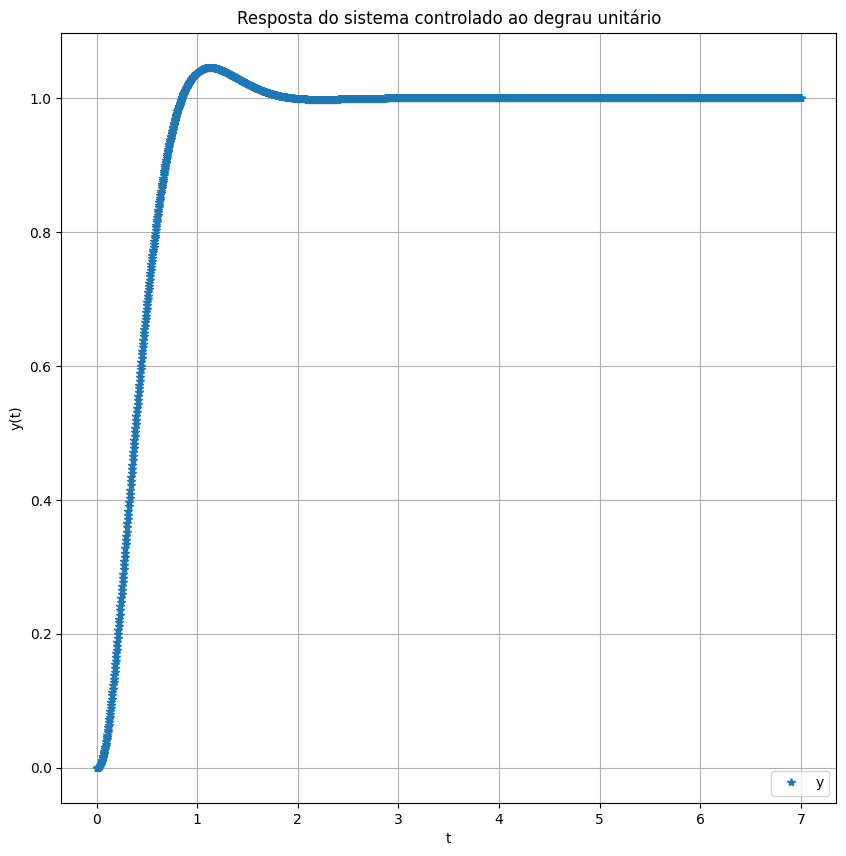

In [40]:
# resposta para entrada ao degrau do sistema controlado
t_final = 7
Y_ctrld, t_y_ctrld = control.matlab.step(controlled_sys,t_final);

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10,10)

ax1.plot(t_y_ctrld,Y_ctrld,'*')
ax1.set_title("Resposta do sistema controlado ao degrau unitário")
ax1.set_xlabel("t")
ax1.set_ylabel("y(t)")
ax1.legend(['y'],loc="lower right")
ax1.grid(True,'both')

In [44]:
# Sobressinal percentual
Mp = (max(Y_ctrld)-Y_ctrld[-1])/(Y_ctrld[-1]-Y_ctrld[0]);
print(f'Mp = {Mp*100}%')

# Tempo de acomodação para 5%

Mp = 4.573587919535682%


In [ ]:
# Sobressinal percentual
Mp = (max(Y_ctrld)-Y_ctrld[-1])/(Y_ctrld[-1]-Y_ctrld[0]);
print(f'Mp = {Mp*100}%')

# Tempo de acomodação para 5%

j = len(t_y_ctrld)-1;
delta = 0;
while (delta < t_final):
    delta = abs((Y_ctrld[j]-Y_ctrld[-1])/Y_ctrld[-1]);
    ts = t_y_ctrld[j];
    j = j-1;
   
print(f'\nTs5% = {ts*1000}ms')

In [52]:
# comportamento da saída y 
mp = max(Y_ctrld)-Y_ctrld[len(Y_ctrld)-1]
print("Mp pratico =",mp)
print("Mp teorico =",Mp)

# Tempo de acomodação para 5%
i = len(t_y_ctrld) - 1
delta = 0
while delta < 0.05:
    delta = abs(Y_ctrld[-1] - Y_ctrld[i]) / Y_ctrld[-1]
    ts = t_y_ctrld[i]
    i = i - 1
    
print("\nts5% pratico =",ts)
print("ts5% teorico =",ts5)

# Tempo de pico
j = 0
ind = Y_ctrld[0]
while ind < max(Y_ctrld):
    tp_pratico = t_y_ctrld[j]
    j = j+1
    ind = Y_ctrld[j+1]
    
print("\ntp pratico =",tp_pratico)
print("\ntp teorico =",tp)

Mp pratico = 0.04573587899331333
Mp teorico = 0.04573587919535682

ts5% pratico = 0.7493833251110015
ts5% teorico = 1.0714285714285714

tp pratico = 1.1188949185989148

tp teorico = 1.0997774062376235
